In [1]:
import turicreate as tc
import matplotlib.pyplot as plt

In [2]:
train_data = tc.image_analysis.load_images("snacks/train", with_path=True)

Unsupported image format. Supported formats are JPEG and PNG	 file: snacks/train/.DS_Store

In [3]:
len(train_data)

4838

In [4]:
train_data.head()

path,image
snacks/train/healthy/apple/007a0bec00a90a66.jpg ...,Height: 341 Width: 256
snacks/train/healthy/apple/007ec56b6529e036.jpg ...,Height: 256 Width: 341
snacks/train/healthy/apple/00881627629888f6.jpg ...,Height: 256 Width: 384
snacks/train/healthy/apple/00bb5720a7ba062e.jpg ...,Height: 256 Width: 341
snacks/train/healthy/apple/00cc1c601b23f73d.jpg ...,Height: 256 Width: 341
snacks/train/healthy/apple/01477ea37494a8ac.jpg ...,Height: 256 Width: 382
snacks/train/healthy/apple/018257a792aa90e6.jpg ...,Height: 256 Width: 256
snacks/train/healthy/apple/01968ea73417ec3b.jpg ...,Height: 256 Width: 256
snacks/train/healthy/apple/01ecc03a12e21e39.jpg ...,Height: 256 Width: 446
snacks/train/healthy/apple/021d2569ce62aa93.jpg ...,Height: 256 Width: 341


In [5]:
train_data.explore()

Materializing SFrame

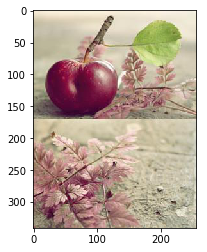

In [6]:
plt.imshow(train_data[0]["image"].pixel_data)

In [7]:
# Grab the full path of the first training example
path = train_data[0]["path"]
print(path)

# Find the class label
import os
os.path.basename(os.path.split(path)[0])

snacks/train/healthy/apple/007a0bec00a90a66.jpg


'apple'

In [8]:
train_data["label"] = train_data["path"].apply(lambda path: 
                                               os.path.basename(os.path.split(path)[0]))

In [9]:
train_data.head() 

path,image,label
snacks/train/healthy/apple/007a0bec00a90a66.jpg ...,Height: 341 Width: 256,apple
snacks/train/healthy/apple/007ec56b6529e036.jpg ...,Height: 256 Width: 341,apple
snacks/train/healthy/apple/00881627629888f6.jpg ...,Height: 256 Width: 384,apple
snacks/train/healthy/apple/00bb5720a7ba062e.jpg ...,Height: 256 Width: 341,apple
snacks/train/healthy/apple/00cc1c601b23f73d.jpg ...,Height: 256 Width: 341,apple
snacks/train/healthy/apple/01477ea37494a8ac.jpg ...,Height: 256 Width: 382,apple
snacks/train/healthy/apple/018257a792aa90e6.jpg ...,Height: 256 Width: 256,apple
snacks/train/healthy/apple/01968ea73417ec3b.jpg ...,Height: 256 Width: 256,apple
snacks/train/healthy/apple/01ecc03a12e21e39.jpg ...,Height: 256 Width: 446,apple
snacks/train/healthy/apple/021d2569ce62aa93.jpg ...,Height: 256 Width: 341,apple


In [10]:
train_data["label"].summary()


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  4838 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   20  |    No    |
+------------------+-------+----------+

Most frequent items:
+-------+-----------+-------+--------+-------+-------+-------+------------+----------+
| value | pineapple | apple | banana | grape | juice | salad | watermelon | doughnut |
+-------+-----------+-------+--------+-------+-------+-------+------------+----------+
| count |    260    |  250  |  250   |  250  |  250  |  250  |    250     |   250    |
+-------+-----------+-------+--------+-------+-------+-------+------------+----------+
+---------+-----------+
| hot dog | ice cream |
+---------+-----------+
|   250   |    250    |
+---------+-----------+


In [11]:
train_data["label"].value_counts().print_rows(num_rows=20)

+------------+-------+
|   value    | count |
+------------+-------+
| pineapple  |  260  |
|   banana   |  250  |
|   muffin   |  250  |
| watermelon |  250  |
|   salad    |  250  |
|   juice    |  250  |
|   grape    |  250  |
| ice cream  |  250  |
|   apple    |  250  |
|  hot dog   |  250  |
|   waffle   |  250  |
|  doughnut  |  250  |
|   carrot   |  249  |
|   cookie   |  249  |
|   candy    |  249  |
|   orange   |  249  |
|    cake    |  249  |
| strawberry |  249  |
|  popcorn   |  180  |
|  pretzel   |  154  |
+------------+-------+
[20 rows x 2 columns]



In [12]:
model = tc.image_classifier.create(train_data, target="label", 
                                   model="VisionFeaturePrint_Screen",
                                   verbose=True, max_iterations=15)

# Or load HealthySnacks.model from starter/notebook folder
# model = tc.load_model("HealthySnacks.model")

Analyzing and extracting image features.

+------------------+--------------+------------------+

| Images Processed | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 64               | 28.51s       | 1.25%            |

| 128              | 28.55s       | 2.5%             |

| 192              | 28.58s       | 3.75%            |

| 256              | 28.61s       | 5.25%            |

| 320              | 28.63s       | 6.5%             |

| 640              | 28.77s       | 13%              |

| 3200             | 1m 53s       | 65.75%           |

| 4838             | 2m 22s       | 100%             |

+------------------+--------------+------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 4608

Number of classes           : 20

Number of feature columns   : 1

Number of unpacked features : 2048

Number of coefficients      : 38931

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 1        | NaN       | 0.303950     | 0.052083          | 0.043478            |

| 1         | 3        | 0.000217  | 1.076397     | 0.678168          | 0.713043            |

| 2         | 6        | 0.500000  | 2.126714     | 0.769097          | 0.813043            |

| 3         | 7        | 0.500000  | 2.564389     | 0.781901          | 0.834783            |

| 4         | 8        | 0.500000  | 3.008689     | 0.799696          | 0.830435            |

| 5         | 9        | 0.500000  | 3.437420     | 0.827691          | 0.843478            |

| 10        | 14       | 0.500000  | 5.612373     | 0.879557          | 0.895652            |

| 15        | 19       | 0.500000  | 7.750796     | 0.922960          | 0.913043            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

Completed (Iteration limit reached).

This model may not be optimal. To improve it, consider increasing `max_iterations`.

In [13]:
test_data = tc.image_analysis.load_images("snacks/test", with_path=True)

test_data["label"] = test_data["path"].apply(lambda path: 
       os.path.basename(os.path.split(path)[0]))

len(test_data)

Unsupported image format. Supported formats are JPEG and PNG	 file: snacks/test/.DS_Store

952

In [14]:
metrics = model.evaluate(test_data)

Analyzing and extracting image features.

+------------------+--------------+------------------+

| Images Processed | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 64               | 21.65s       | 6.5%             |

| 128              | 21.68s       | 13.25%           |

| 192              | 21.70s       | 20%              |

| 256              | 21.73s       | 26.5%            |

| 320              | 21.76s       | 33.25%           |

| 640              | 21.89s       | 66.5%            |

| 952              | 27.07s       | 100%             |

+------------------+--------------+------------------+

In [15]:
print("Accuracy: ", metrics["accuracy"])
print("Precision: ", metrics["precision"])
print("Recall: ", metrics["recall"])
print("Confusion Matrix:\n", metrics["confusion_matrix"])

Accuracy:  0.8802521008403361
Precision:  0.8853477430032516
Recall:  0.8805238095238094
Confusion Matrix:
 +--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|    apple     |      banana     |   3   |
|  pineapple   |    pineapple    |   36  |
|    carrot    |      salad      |   3   |
|  pineapple   |       cake      |   1   |
|     cake     |      cookie     |   5   |
|   pretzel    |      waffle     |   1   |
|  strawberry  |      salad      |   3   |
|    orange    |      carrot     |   2   |
|  strawberry  |      carrot     |   1   |
|    orange    |    watermelon   |   2   |
+--------------+-----------------+-------+
[98 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [16]:
model

Class                                    : ImageClassifier

Schema
------
Number of classes                        : 20
Number of feature columns                : 1
Input image shape                        : (3, 299, 299)

Training summary
----------------
Number of examples                       : 4608
Training loss                            : 1289.1496
Training time (sec)                      : 155.6291

In [17]:
model.save("HealthySnacks.model")

In [18]:
model.export_coreml("HealthySnacks.mlmodel")